###Passo 1: Montar o Google Drive

Vamos começar conectando nosso ambiente do Colab ao Google Drive. Isso nos permite salvar arquivos de forma persistente. Se baixarmos o dataset para o nosso Drive, não precisaremos repetir o download toda vez que abrirmos o notebook. Além disso, poderemos salvar nosso modelo treinado diretamente no Drive.

In [1]:
# Célula 1: Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Passo 2: Configurar a API do Kaggle
Para baixar o dataset de forma eficiente e programática, usaremos a API oficial do Kaggle. Esta célula irá preparar o ambiente para a autenticação. Primeiro, ela solicita o upload do seu token de API (kaggle.json), que você pode gerar no site do Kaggle. Em seguida, move esse token para o diretório correto e define as permissões para que a API possa usá-lo com segurança.

In [2]:
# Célula 2: Fazer upload do seu kaggle.json
from google.colab import files

print("Por favor, faça o upload do seu arquivo kaggle.json")
files.upload()

# Move o arquivo para o diretório correto e ajusta permissões
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Por favor, faça o upload do seu arquivo kaggle.json


Saving kaggle.json to kaggle.json


### Passo 3: Baixar e Descompactar o Dataset

Com a API já configurada, esta célula executa o comando para baixar o dataset "Facial Emotion Recognition" (fahadullaha/facial-emotion-recognition-dataset). Após o download, o arquivo .zip é descompactado na área de trabalho do Colab. Para manter o ambiente limpo e economizar espaço, o arquivo compactado é removido logo em seguida.

In [3]:
# Célula 3: Baixar o dataset do Kaggle
!kaggle datasets download -d fahadullaha/facial-emotion-recognition-dataset

# Descompactar os dados e remover o arquivo .zip
!unzip -q facial-emotion-recognition-dataset.zip
!rm facial-emotion-recognition-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/fahadullaha/facial-emotion-recognition-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 66% 132M/200M [00:00<00:00, 1.37GB/s]
100% 200M/200M [00:00<00:00, 1.02GB/s]


### Passo 4: Análise da Distribuição dos Dados

Uma etapa fundamental em qualquer projeto de Machine Learning é entender os dados. Nesta célula, vamos contar o número de imagens para cada emoção, tanto no conjunto de treino quanto no de teste. Usaremos a biblioteca pandas para organizar esses números em uma tabela clara e, em seguida, matplotlib e seaborn para criar um gráfico de barras, nos permitindo visualizar facilmente se há um desbalanceamento entre as classes (ou seja, se uma emoção tem muito mais imagens que outra).

Distribuição das imagens no dataset:
    Emotion  Image Count
6     happy        11398
0   neutral         8166
3       sad         6535
2   disgust         5920
1  surprise         5920
4      fear         5920
5     angry         5920


/tmp/ipython-input-3441214492.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Image Count', data=data_df, palette='viridis')


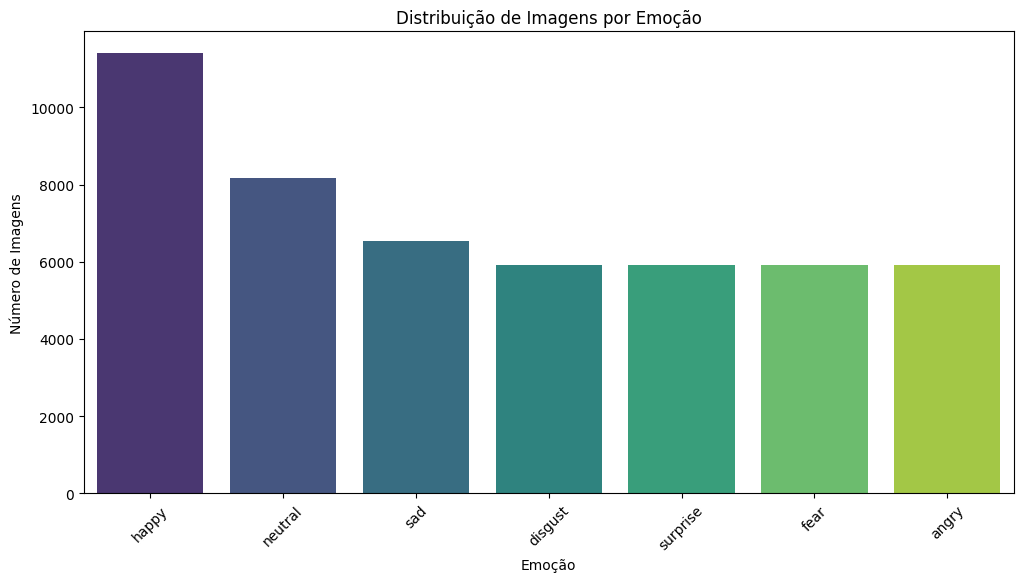

In [5]:
# Célula 4: Contar imagens e analisar a distribuição
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CORREÇÃO APLICADA AQUI ---
# O caminho agora aponta para a pasta onde seus dados realmente estão.
base_dir = 'processed_data'

def count_files(directory):
    """Conta os arquivos em cada subdiretório."""
    counts = {}
    # Adicionamos uma verificação para garantir que o diretório existe
    if not os.path.isdir(directory):
        print(f"Erro: O diretório '{directory}' não foi encontrado! Verifique o nome da pasta.")
        return None

    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            counts[emotion] = len(os.listdir(emotion_path))
    return counts

# Contar os arquivos no diretório principal
image_counts = count_files(base_dir)

# O código só continua se a pasta for encontrada e os arquivos contados
if image_counts:
    # Criar um DataFrame para visualização
    data_df = pd.DataFrame(image_counts.items(), columns=['Emotion', 'Image Count']).sort_values(by='Image Count', ascending=False)

    print("Distribuição das imagens no dataset:")
    print(data_df)

    # Plotar a distribuição
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Emotion', y='Image Count', data=data_df, palette='viridis')
    plt.title('Distribuição de Imagens por Emoção')
    plt.xlabel('Emoção')
    plt.ylabel('Número de Imagens')
    plt.xticks(rotation=45)
    plt.show()

### Principais Insights da Análise Exploratória

Após carregar, visualizar e analisar a distribuição do dataset, chegamos às seguintes conclusões que irão guiar as próximas etapas do nosso projeto:

* **Desbalanceamento de Classes é o Principal Desafio:**
    * O insight mais crítico é a distribuição desigual de imagens entre as emoções. A classe **`happy`** é a mais predominante, com mais de 11.000 amostras.
    * Em contrapartida, as classes **`disgust`**, **`surprise`**, **`fear`** e **`angry`** são as menos representadas, cada uma com pouco menos de 6.000 amostras.
    * **Impacto:** Um modelo treinado diretamente nestes dados pode desenvolver um forte viés, tornando-se excelente em reconhecer felicidade, mas ineficaz para emoções menos frequentes.

* **Necessidade de Estratégias de Mitigação:**
    * Para combater o desbalanceamento, será essencial aplicar técnicas como o uso de **`class_weight`** durante o treinamento do `TensorFlow/Keras`. Isso penalizará mais o modelo por erros nas classes minoritárias, forçando-o a dar mais atenção a elas.

* **Características das Imagens:**
    * A visualização confirmou que as imagens estão em **escala de cinza** e têm um tamanho padronizado (48x48 pixels).
    * Existe uma boa variedade de rostos, idades, poses e condições de iluminação, o que torna o desafio mais realista e interessante.

* **Estrutura do Dataset:**
    * Os dados não vieram pré-divididos em pastas de treino e teste. Portanto, um passo crucial no próximo notebook será **criar manualmente uma divisão** (por exemplo, 80% para treino e 20% para validação) para que possamos avaliar nosso modelo de forma justa.